#algorithm's descriptive procedure

1 The data was taken as current and voltage for all the three phases individually

2 ABCD columns were made to represent the faults or the status of each line and ground or its combination with the help of ABCD digital pattern

3 then comes data analysis. we saw how many 0s and 1s are there in the dround and ABC columns using bar plot

4 then we defined different types of faults in a separate column based on the line ABC and ground fault combinations

5 then we graphically analyzed the currents and voltages behaviour for the cases when there is no fault and for all other cases of ABC and ground faults combination

6 we transformed the fault-type column into digits which was in word fomat before.

7 selected input and output features and divided data into train and test

8 then comes models implementation process, we tried multiple modeld including, random forest, decision tree, XGBoost, SVM and logistic regression

9 we got best accuracy by random forest, SGBoost and decision tree

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_class = pd.read_csv("/content/drive/MyDrive/Fundamentals Project/Data.csv")
df_class.sample(10)#.style.set_properties(**{'background-color': 'blue',
                          # 'color': 'white',
                          # 'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
1378,1,0,1,1,856.298458,-301.445704,23.881182,0.026558,-0.333685,0.307127
1695,1,0,1,1,385.984279,-887.328998,-44.446114,-0.024932,0.080370,-0.055438
6977,0,0,0,0,-50.191583,94.965285,-47.895199,-0.542990,0.029676,0.513314
1558,1,0,1,1,-864.721825,543.910144,-6.459762,-0.014938,0.263345,-0.248406
119,1,0,0,1,-216.040626,31.327194,-48.693570,-0.346699,0.604109,-0.257410
4505,1,1,1,1,85.085965,-818.141266,733.101658,-0.035148,-0.002555,0.037703
2232,1,0,1,1,451.134132,-1.874558,34.275620,0.280026,-0.575274,0.295248
223,1,0,0,1,860.061364,61.268776,-8.834437,-0.137497,-0.084605,0.222102
4469,1,1,1,1,-381.393609,-516.572513,898.072615,-0.040965,0.019332,0.021633
7546,0,0,0,0,6.907394,-29.768159,19.905376,0.593321,-0.274232,-0.319089


In [ ]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [ ]:
df_class.isnull().sum()#.sum()

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

In [ ]:
df_class.shape

(7861, 10)

Text(0.5, 1.0, 'Ground Fault')

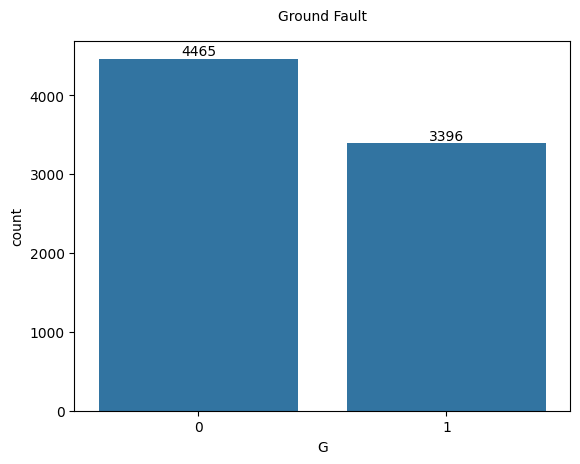

In [ ]:
# Distribution of Ground Fault

#ax = plt.subplot(1,2,1)
ax = plt.plot()
ax = sns.countplot(x='G', data=df_class)
ax.bar_label(ax.containers[0])
plt.title("Ground Fault", fontsize=25,color = 'Black',font='Time New Roman',pad=15)

#ax =plt.subplot(1,2,2)
#ax=df_class['G'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
#ax.set_title(label = "Ground Fault", fontsize = 20,color='Brown',font='Lucida Calligraphy',pad=20);

Text(0.5, 1.0, 'Line A Fault')

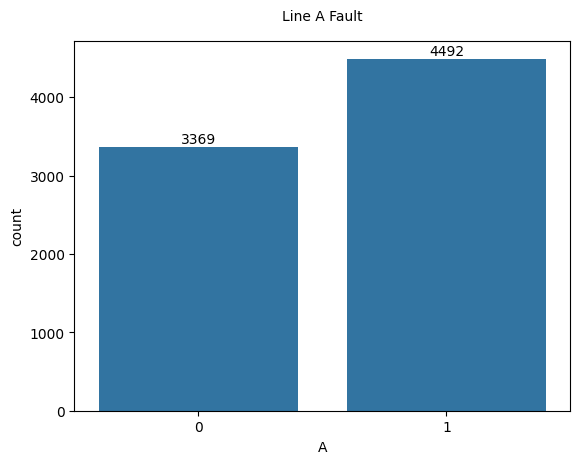

In [ ]:
# Distribtion of Fault in Line A
ax = plt.plot()
ax = sns.countplot(x='A', data=df_class)
ax.bar_label(ax.containers[0])
plt.title("Line A Fault", fontsize=25,color = 'Black',font='Time New Roman',pad=15)

#ax =plt.subplot(1,2,2)
#ax=df_class['A'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
#ax.set_title(label = "Line A Fault", fontsize = 20,color='Brown',font='Lucida Calligraphy',pad=20);

Text(0.5, 1.0, 'Line B Fault')

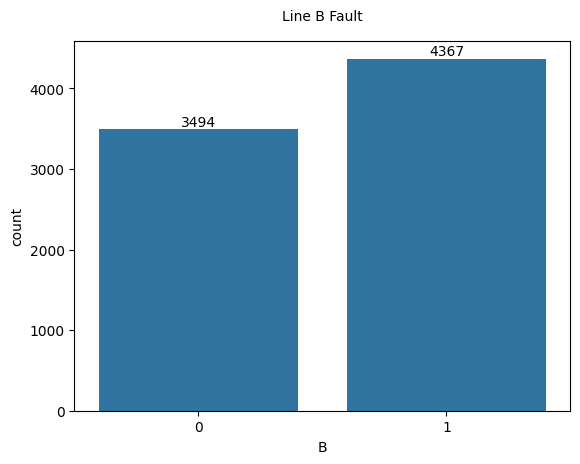

In [ ]:
# Distribtion of Fault in Line B
ax = plt.plot()
ax = sns.countplot(x='B', data=df_class)
ax.bar_label(ax.containers[0])
plt.title("Line B Fault", fontsize=25,color = 'Black',font='Time New Roman',pad=15)

#ax =plt.subplot(1,2,2)
#ax=df_class['B'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
#ax.set_title(label = "Line B Fault", fontsize = 20,color='Brown',font='Lucida Calligraphy',pad=20);

Text(0.5, 1.0, 'Line C Fault')

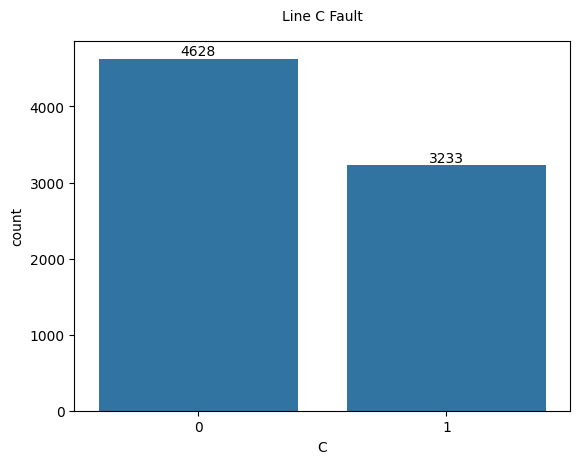

In [ ]:
# Distribution of Fault in Line C
ax = plt.plot()
ax = sns.countplot(x='C', data=df_class)
ax.bar_label(ax.containers[0])
plt.title("Line C Fault", fontsize=25,color = 'Black',font='Time New Roman',pad=15)

#ax =plt.subplot(1,2,2)
#ax=df_class['C'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
#ax.set_title(label = "Line C Fault", fontsize = 20,color='Brown',font='Lucida Calligraphy',pad=20);

In [ ]:
# Representing faults in one Fault_Type Column    Here we actually added up all the ABCG columns and made it a new one
df_class['Fault_Type'] = df_class['G'].astype('str') + df_class['C'].astype('str') + df_class['B'].astype('str') + df_class['A'].astype('str')
df_class.head()#.style.set_properties(**{'background-color': 'blue',
                         #  'color': 'white',
                          # 'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [ ]:
# Replacing Values of Fault Type For Easy Visualization

df_class['Fault_Type'][df_class['Fault_Type'] == '0000' ] = 'NO Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '0111' ] = 'Line A Line B Line C'
df_class['Fault_Type'][df_class['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'

df_class.sample(10)#.style.set_properties(**{'background-color': 'blue',
                    #       'color': 'white',
                     #      'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
6158,0,0,0,0,-35.016421,98.569017,-66.929705,-0.607095,0.208946,0.398149,NO Fault
656,1,0,0,1,837.248666,35.663927,16.680594,0.057444,-0.370756,0.313312,Line A to Ground Fault
4053,0,1,1,1,-616.421154,856.709285,-238.256357,0.013105,0.028341,-0.041447,Line A Line B Line C
3542,0,1,1,1,730.364022,67.494740,-795.724723,0.037453,-0.035918,-0.001535,Line A Line B Line C
5615,0,0,0,0,54.490591,-7.421287,-48.158496,0.257328,0.354093,-0.611421,NO Fault
5904,0,0,0,0,-35.337019,-0.633956,32.512571,0.471366,-0.534905,0.063539,NO Fault
4636,1,1,1,1,744.999359,38.974245,-783.973295,0.036803,-0.036592,-0.000212,Line A Line B Line C to Ground Fault
5140,1,1,1,1,-521.845408,878.172182,-356.329038,0.018641,0.023635,-0.042276,Line A Line B Line C to Ground Fault
7539,0,0,0,0,0.043554,-27.397419,24.396488,0.590961,-0.330677,-0.260284,NO Fault
7831,0,0,0,0,-71.063267,61.957937,6.229790,-0.141980,-0.429776,0.571755,NO Fault


In [ ]:
# Analyzing the Statistics of the dataset. what statistics
df_class.describe()#.style.background_gradient(cmap='rainbow').set_precision(3)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


In [ ]:
# Analyzing the count of different types of fault types.
df_class['Fault_Type'].value_counts(ascending=False)

NO Fault                                2365
Line A Line B to Ground Fault           1134
Line A Line B Line C to Ground Fault    1133
Line A to Ground Fault                  1129
Line A Line B Line C                    1096
Line B to Line C Fault                  1004
Name: Fault_Type, dtype: int64

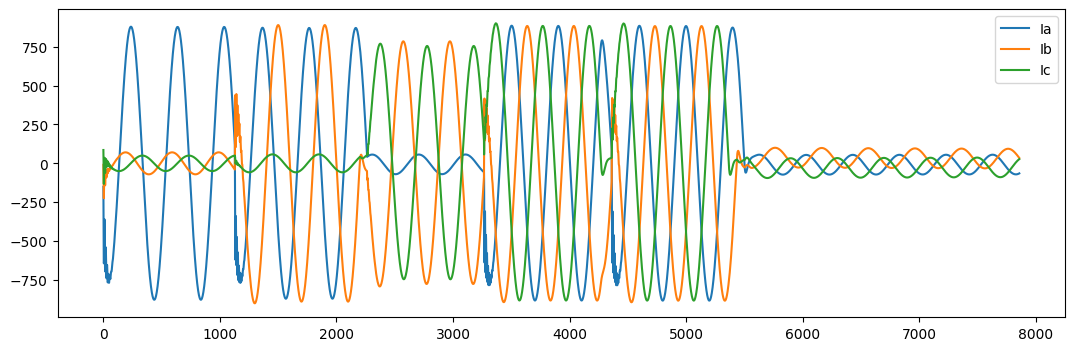

In [ ]:
# Plotting the Current Values in the Dataset
plt.figure(figsize = (13,4))
plt.plot(df_class["Ia"], label="Ia")
plt.plot(df_class["Ib"], label="Ib")
plt.plot(df_class["Ic"], label="Ic");
plt.legend()

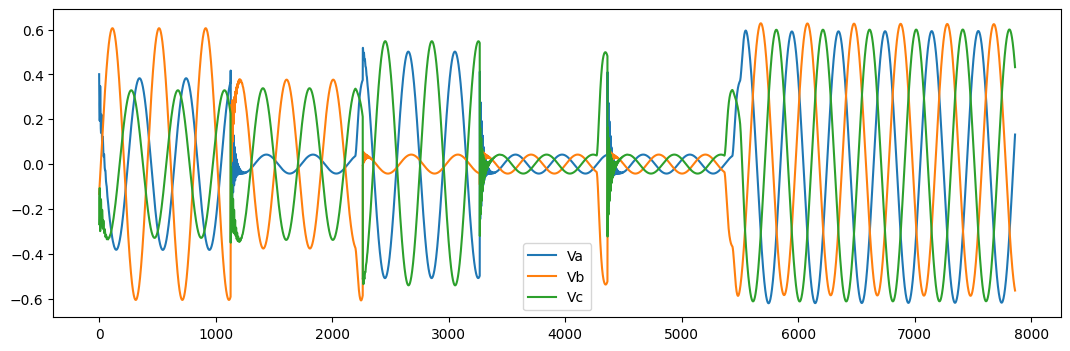

In [ ]:
# Plotting Voltage Values in the Dataset
plt.figure(figsize = (13,4))
plt.plot(df_class["Va"], label="Va" )
plt.plot(df_class["Vb"], label="Vb" )
plt.plot(df_class["Vc"], label="Vc" );
plt.legend()

#observation part is missing. Observation of data in different ways

##we will start now data processing, in which we will separate the faults of different types into different categorical sections

In [ ]:
#now this is no fault data. data when the system runs well
No_Fault = df_class[df_class['Fault_Type'] == 'NO Fault' ]
No_Fault.sample(5)#.style.set_properties(**{'background-color': 'blue',
                   #        'color': 'white',
                    #       'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
6188,0,0,0,0,-58.406553,94.473497,-39.434332,-0.485592,-0.073111,0.558702,NO Fault
7792,0,0,0,0,-59.525406,87.865058,-31.225990,-0.458726,-0.113495,0.572222,NO Fault
5619,0,0,0,0,55.114130,-4.442909,-51.958765,0.222931,0.385261,-0.608193,NO Fault
7494,0,0,0,0,-42.755662,2.738255,37.047213,0.410841,-0.568630,0.157790,NO Fault
6129,0,0,0,0,-6.942146,89.436636,-85.881020,-0.601770,0.443250,0.158520,NO Fault


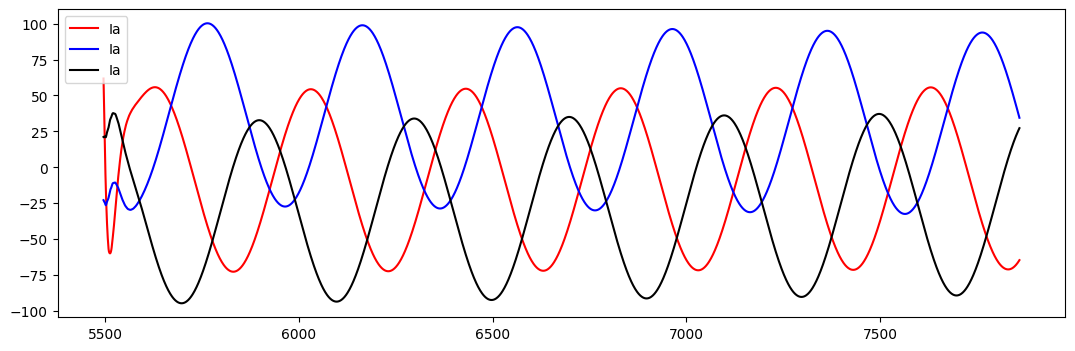

In [ ]:
#No fault
# Plot of Current for No Fault
ax = plt.figure(figsize = (13,4))
ax = plt.plot(No_Fault["Ia"],'r', label="Ia")
ax = plt.plot(No_Fault["Ib"],'b', label="Ia")
ax = plt.plot(No_Fault["Ic"],'black', label="Ia");
plt.legend()


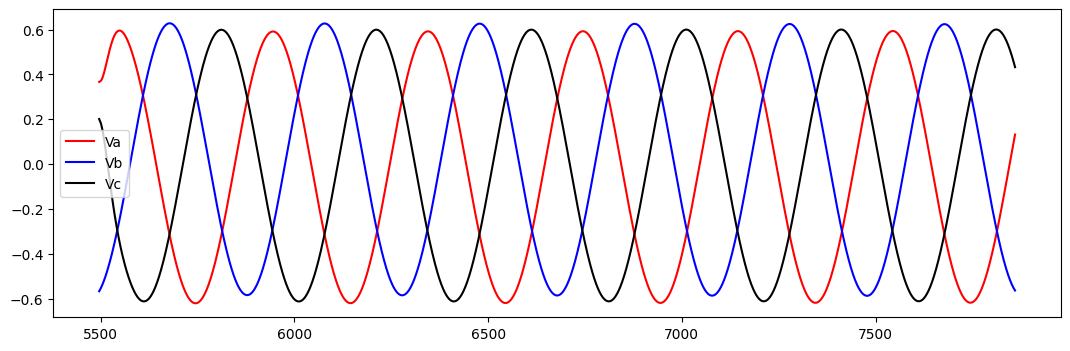

In [ ]:
# Plot of Voltage for No Fault
ax = plt.figure(figsize = (13,4))
ax = plt.plot(No_Fault["Va"],'r', label="Va")
ax = plt.plot(No_Fault["Vb"],'b', label="Vb")
ax = plt.plot(No_Fault["Vc"],'black', label="Vc");
plt.legend()

##this is the observation of data with no fault

In [ ]:
"""# Distribution of Features in No Fault Class
plt.figure(figsize= (15,10))
#plt.suptitle("Distributions of Different Features", fontsize = 20)
#Histograms
plt.subplot(3,3,1)
sns.distplot(No_Fault['Va'], rug = True, kde = False)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,2)
sns.distplot(No_Fault['Ia'], color= 'green',rug = True, kde = False)
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Kde Plots
plt.subplot(3,3,4)
sns.kdeplot(No_Fault['Va'], shade = True)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,5)
sns.kdeplot(No_Fault['Ia'], shade = True, color = 'g')
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Box Plots
plt.subplot(3,3,7)
sns.boxplot(x = No_Fault['Va'], orient = 'v',color= 'b', boxprops=dict(alpha=.5))
plt.subplot(3,3,8)
sns.boxplot(x = No_Fault['Ia'], orient = 'v', color= 'g', boxprops=dict(alpha=.5))


plt.tight_layout()
plt.show()"""

'# Distribution of Features in No Fault Class\nplt.figure(figsize= (15,10))\n#plt.suptitle("Distributions of Different Features", fontsize = 20)\n#Histograms\nplt.subplot(3,3,1)\nsns.distplot(No_Fault[\'Va\'], rug = True, kde = False)\nplt.xlabel(\'Voltage in Per Unit(pu)\', fontsize = 12)\nplt.title(\'Distribution of Voltage\',fontsize = 15)\n\nplt.subplot(3,3,2)\nsns.distplot(No_Fault[\'Ia\'], color= \'green\',rug = True, kde = False)\nplt.title(\'Distribution of Load of Line\',fontsize = 15)\nplt.xlabel(\'Load on line in Amperes\', fontsize = 12)\n\n\n#Kde Plots\nplt.subplot(3,3,4)\nsns.kdeplot(No_Fault[\'Va\'], shade = True)\nplt.xlabel(\'Voltage in Per Unit(pu)\', fontsize = 12)\nplt.title(\'Distribution of Voltage\',fontsize = 15)\n\nplt.subplot(3,3,5)\nsns.kdeplot(No_Fault[\'Ia\'], shade = True, color = \'g\')\nplt.title(\'Distribution of Load of Line\',fontsize = 15)\nplt.xlabel(\'Load on line in Amperes\', fontsize = 12)\n\n\n#Box Plots\nplt.subplot(3,3,7)\nsns.boxplot(x = No_

#the system with fault in line A to ground

In [ ]:
Line_AG_Fault = df_class[df_class['Fault_Type'] == 'Line A to Ground Fault' ]
Line_AG_Fault.head()#.style.set_properties(**{'background-color': 'blue',
                     #      'color': 'white',
                      #     'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


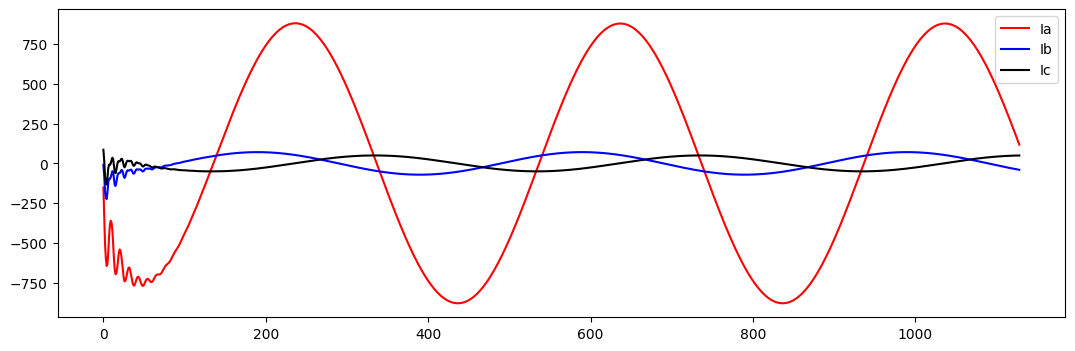

In [ ]:
# Plot for values of Current in Line A to Ground Fault
ax = plt.figure(figsize = (13,4))
ax = plt.plot(Line_AG_Fault["Ia"],'r', label="Ia")
ax = plt.plot(Line_AG_Fault["Ib"],'b', label="Ib")
ax = plt.plot(Line_AG_Fault["Ic"],'black', label="Ic");
plt.legend()

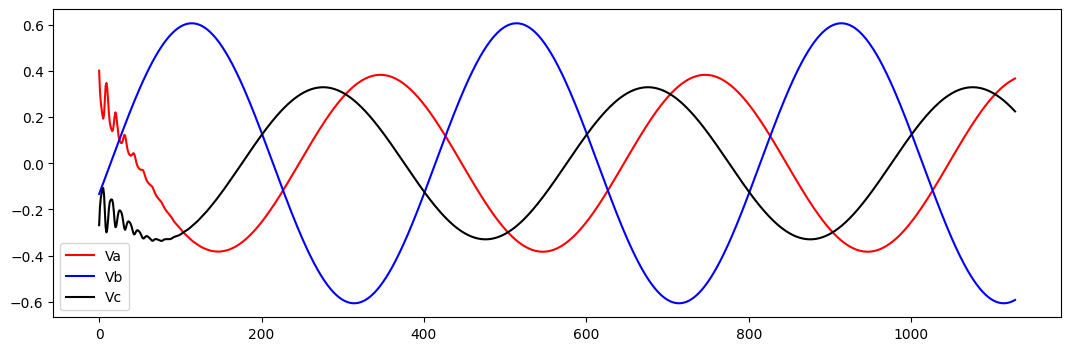

In [ ]:
# Plot for values of Voltage in Line A to Ground Fault
ax = plt.figure(figsize = (13,4))
ax = plt.plot(Line_AG_Fault["Va"],'r', label="Va")
ax = plt.plot(Line_AG_Fault["Vb"],'b', label="Vb")
ax = plt.plot(Line_AG_Fault["Vc"],'black', label="Vc");
plt.legend()

#Now data for the system having fault with line A, line B to ground fault

In [ ]:
Line_ABG_Fault = df_class[df_class['Fault_Type'] == 'Line A Line B to Ground Fault' ]
Line_ABG_Fault.head()#.style.set_properties(**{'background-color': 'blue',
                      #     'color': 'white',
                       #    'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
1129,1,0,1,1,-83.713374,42.102812,38.015631,0.416930,-0.066439,-0.350491,Line A Line B to Ground Fault
1130,1,0,1,1,-304.258650,243.536374,42.670680,0.097053,0.089765,-0.186818,Line A Line B to Ground Fault
1131,1,0,1,1,-487.104324,377.325956,29.573282,-0.132447,0.203226,-0.070779,Line A Line B to Ground Fault
1132,1,0,1,1,-603.543045,439.399623,9.638569,-0.248609,0.263483,-0.014873,Line A Line B to Ground Fault
1133,1,0,1,1,-620.718849,423.222790,0.613787,-0.226918,0.254651,-0.027733,Line A Line B to Ground Fault


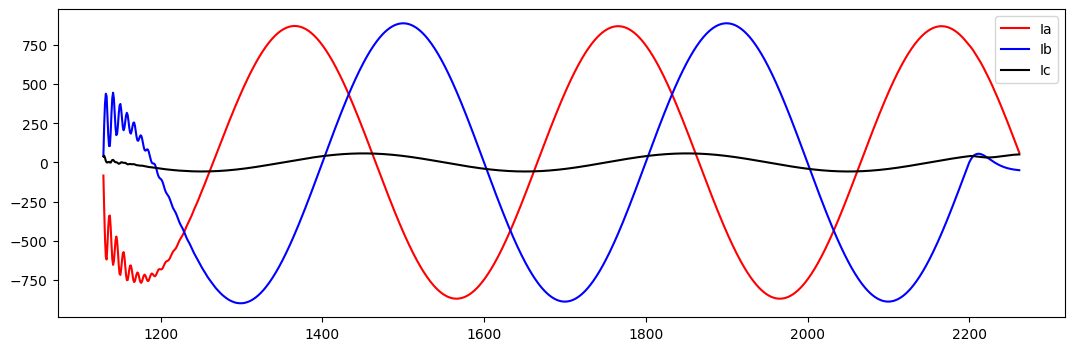

In [ ]:
# Plot for values of current in Line A Line B to Ground Fault
ax = plt.figure(figsize = (13,4))
ax = plt.plot(Line_ABG_Fault["Ia"],'r', label="Ia")
ax = plt.plot(Line_ABG_Fault["Ib"],'b', label="Ib")
ax = plt.plot(Line_ABG_Fault["Ic"],'black', label="Ic");
plt.legend()

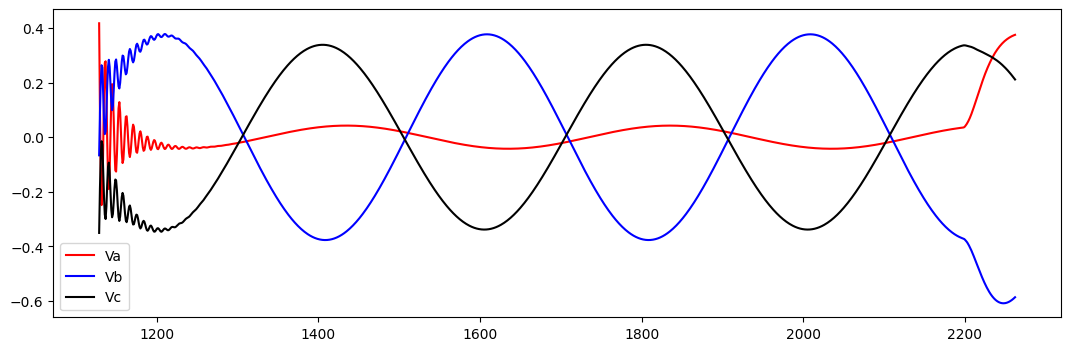

In [ ]:
# Plot for values of Voltage in Line A Line B to Ground Fault
ax = plt.figure(figsize = (13,4))
ax = plt.plot(Line_ABG_Fault["Va"],'r', label="Va")
ax = plt.plot(Line_ABG_Fault["Vb"],'b', label="Vb")
ax = plt.plot(Line_ABG_Fault["Vc"],'black', label="Vc");
plt.legend()

#Now fault with line B to line C

In [ ]:
Line_BC_Fault = df_class[df_class['Fault_Type'] == 'Line B to Line C Fault' ]
Line_BC_Fault.head()#.style.set_properties(**{'background-color': 'blue',
                     #      'color': 'white',
                      #     'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
2263,0,1,1,0,41.764455,-93.940215,55.022192,0.517510,-0.003685,-0.513825,Line B to Line C Fault
2264,0,1,1,0,42.394348,-105.038998,65.494029,0.518491,-0.008071,-0.510420,Line B to Line C Fault
2265,0,1,1,0,43.010571,-105.734383,65.569977,0.511217,0.003798,-0.515015,Line B to Line C Fault
2266,0,1,1,0,43.612456,-100.121739,59.347319,0.499096,0.025105,-0.524201,Line B to Line C Fault
2267,0,1,1,0,44.202230,-95.078643,53.707382,0.487527,0.045052,-0.532579,Line B to Line C Fault


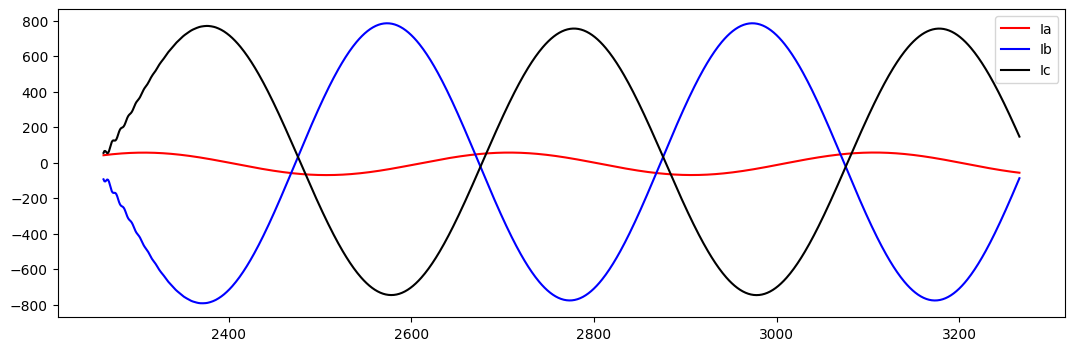

In [ ]:
# Plot for Current Values in Line B to Line C Fault
ax = plt.figure(figsize = (13,4))
ax = plt.plot(Line_BC_Fault["Ia"],'r', label="Ia")
ax = plt.plot(Line_BC_Fault["Ib"],'b', label="Ib")
ax = plt.plot(Line_BC_Fault["Ic"],'black', label="Ic");
plt.legend()

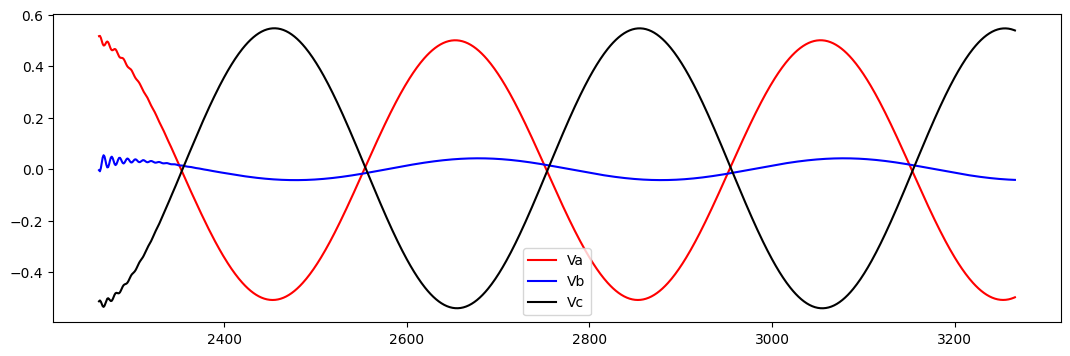

In [ ]:
# Plot for Voltage Values in Line B to Line C Fault
ax = plt.figure(figsize = (13,4))
ax = plt.plot(Line_BC_Fault["Va"],'r', label="Va")
ax = plt.plot(Line_BC_Fault["Vb"],'b', label="Vb")
ax = plt.plot(Line_BC_Fault["Vc"],'black', label="Vc");
plt.legend()

System with the fult in line A, Line B, and Line C

In [ ]:
Line_ABC_Fault = df_class[df_class['Fault_Type'] == 'Line A Line B Line C' ]
Line_ABC_Fault.head()#.style.set_properties(**{'background-color': 'blue',
                      #     'color': 'white',
                       #    'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
3267,0,1,1,1,-99.274309,44.146905,57.318650,0.412305,-0.091525,-0.320781,Line A Line B Line C
3268,0,1,1,1,-342.196277,218.566556,125.820753,0.095905,-0.003471,-0.092434,Line A Line B Line C
3269,0,1,1,1,-526.696029,347.197345,181.689494,-0.131094,0.056790,0.074304,Line A Line B Line C
3270,0,1,1,1,-633.453623,416.942091,218.702118,-0.245984,0.084683,0.161301,Line A Line B Line C
3271,0,1,1,1,-639.192926,412.122656,229.260639,-0.224523,0.075580,0.148943,Line A Line B Line C


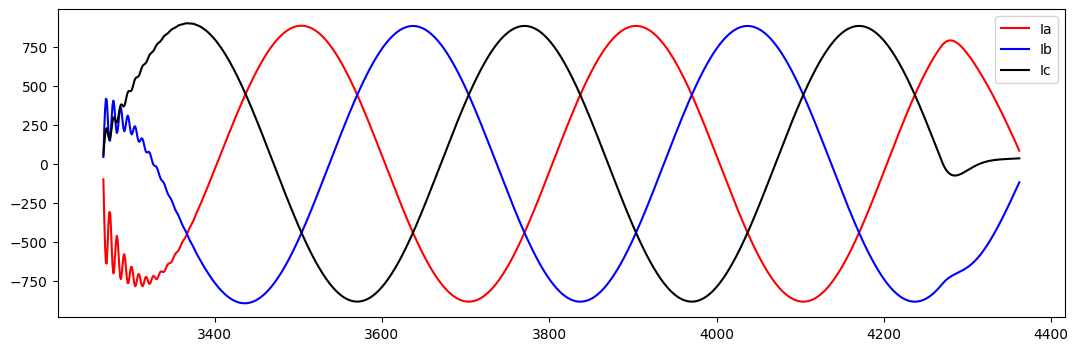

In [ ]:
# Plot for Current Values in Line A Line B Line C Fault
ax = plt.figure(figsize = (13,4))
ax = plt.plot(Line_ABC_Fault["Ia"],'r', label="Ia")
ax = plt.plot(Line_ABC_Fault["Ib"],'b', label="Ib")
ax = plt.plot(Line_ABC_Fault["Ic"],'black', label="Ic");
plt.legend()

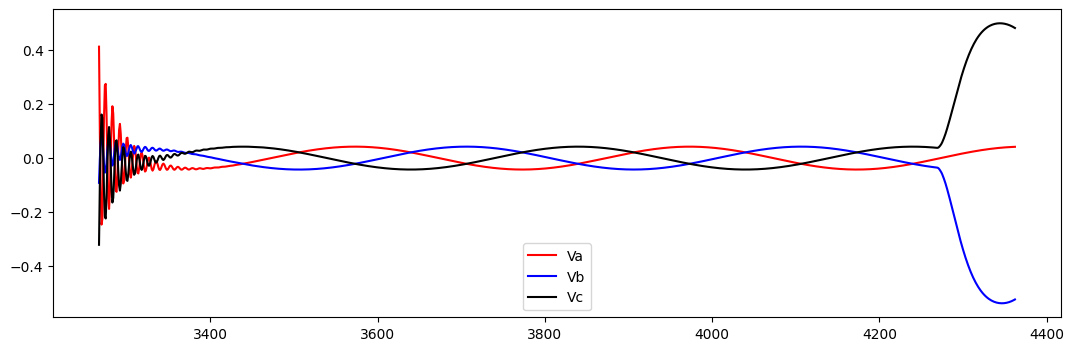

In [ ]:
# Plot for Voltage Values in Line A Line B Line C Fault
ax = plt.figure(figsize = (13,4))
ax = plt.plot(Line_ABC_Fault["Va"],'r', label="Va")
ax = plt.plot(Line_ABC_Fault["Vb"],'b', label="Vb")
ax = plt.plot(Line_ABC_Fault["Vc"],'black', label="Vc");
plt.legend()

#fault with lineA, lineB, lineC, and ground

fa

In [ ]:
Line_ABCG_Fault = df_class[df_class['Fault_Type'] == 'Line A Line B Line C to Ground Fault' ]
Line_ABCG_Fault.head()#.style.set_properties(**{'background-color': 'blue',
                       #    'color': 'white',
                        #   'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
4363,1,1,1,1,-99.252463,52.717974,48.341534,0.410059,-0.086914,-0.323145,Line A Line B Line C to Ground Fault
4364,1,1,1,1,-342.238819,224.821345,119.149604,0.095347,-0.002326,-0.093021,Line A Line B Line C to Ground Fault
4365,1,1,1,1,-526.874012,351.614759,176.674369,-0.130437,0.055441,0.074996,Line A Line B Line C to Ground Fault
4366,1,1,1,1,-633.768916,420.246089,214.577137,-0.244709,0.082066,0.162643,Line A Line B Line C to Ground Fault
4367,1,1,1,1,-639.566896,415.329565,225.117414,-0.223359,0.073192,0.150167,Line A Line B Line C to Ground Fault


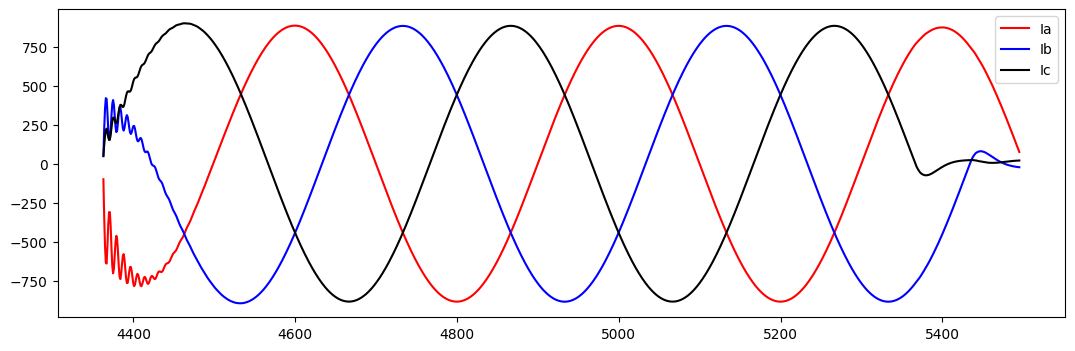

In [ ]:
# Plot for current values in Line A Line B Line C to Ground Fault
ax = plt.figure(figsize = (13,4))
ax = plt.plot(Line_ABCG_Fault["Ia"],'r', label="Ia")
ax = plt.plot(Line_ABCG_Fault["Ib"],'b', label="Ib")
ax = plt.plot(Line_ABCG_Fault["Ic"],'black', label="Ic");
plt.legend()

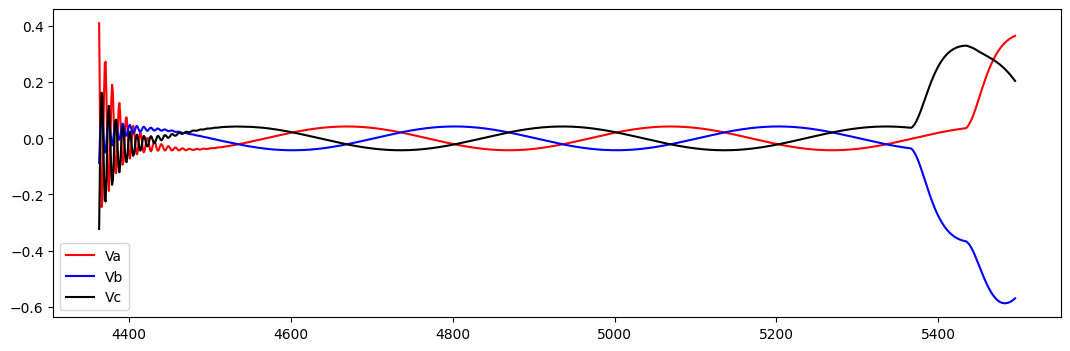

In [ ]:
# Plot for Voltage values in Line A Line B Line C to Ground Fault
ax = plt.figure(figsize = (13,4))
ax = plt.plot(Line_ABCG_Fault["Va"],'r', label="Va")
ax = plt.plot(Line_ABCG_Fault["Vb"],'b', label="Vb")
ax = plt.plot(Line_ABCG_Fault["Vc"],'black', label="Vc");
plt.legend()

In [ ]:
"""plt.figure(figsize= (15,10))
#plt.suptitle("Distributions of Different Features", fontsize = 20)
#Histograms
plt.subplot(3,3,1)
sns.distplot(Line_ABCG_Fault['Va'], rug = True, kde = False)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,2)
sns.distplot(Line_ABCG_Fault['Ia'], color= 'green',rug = True, kde = False)
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Kde Plots
plt.subplot(3,3,4)
sns.kdeplot(Line_ABCG_Fault['Va'], shade = True)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,5)
sns.kdeplot(Line_ABCG_Fault['Ia'], shade = True, color = 'g')
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Box Plots
plt.subplot(3,3,7)
sns.boxplot(x = Line_ABCG_Fault['Va'], orient = 'v',color= 'b', boxprops=dict(alpha=.5))
plt.subplot(3,3,8)
sns.boxplot(x = Line_ABCG_Fault['Ia'], orient = 'v', color= 'g', boxprops=dict(alpha=.5))


plt.tight_layout()
plt.show()

SyntaxError: incomplete input (<ipython-input-56-fad6cb0084e7>, line 1)

#Feature and label separation

In [ ]:
# Categorical to Numerical Conversion for Model Input
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_class['Fault_Type'] = encoder.fit_transform(df_class['Fault_Type'])

df_class.sample(10)#.style.set_properties(**{'background-color': 'blue',
                    #       'color': 'white',
                     #      'border-color': 'darkblack'})

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
1841,1,0,1,1,330.691091,535.760851,57.089846,0.042166,-0.329078,0.286913,2
6389,0,0,0,0,41.316709,-24.067341,-20.552336,0.451391,0.123917,-0.575308,5
2942,0,1,1,0,-60.518663,691.417092,-628.458181,-0.091047,-0.022899,0.113946,4
1440,1,0,1,1,343.546474,524.128422,56.939846,0.042248,-0.331929,0.289681,2
7783,0,0,0,0,-53.869271,91.072882,-40.092447,-0.511989,-0.028827,0.540816,5
4097,0,1,1,1,-877.872527,521.084436,358.811292,-0.015576,0.041924,-0.026348,0
4212,0,1,1,1,114.539977,-815.239658,702.700645,-0.034695,-0.003697,0.038392,0
2732,0,1,1,0,51.959044,-616.080557,566.717809,0.160677,0.028220,-0.188897,4
5051,1,1,1,1,612.681570,244.829885,-857.513718,0.040635,-0.030552,-0.010083,1
3554,0,1,1,1,623.761689,231.585406,-853.215515,0.040496,-0.031059,-0.009437,0


In [ ]:
# Dependent and Independent Variable Sepration
X = df_class.drop(['Fault_Type','G','C','B','A'],axis=1)
y = df_class['Fault_Type']

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)

#model implementation
Logistic Regression

Training Accuracy    : 33.59 %
Model Accuracy Score : 31.98 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.33      0.22      0.26       213
           1       0.00      0.00      0.00       231
           2       0.00      0.00      0.00       248
           3       0.00      0.00      0.00       227
           4       0.00      0.00      0.00       198
           5       0.32      1.00      0.48       456

    accuracy                           0.32      1573
   macro avg       0.11      0.20      0.12      1573
weighted avg       0.14      0.32      0.18      1573

--------------------------------------------------------


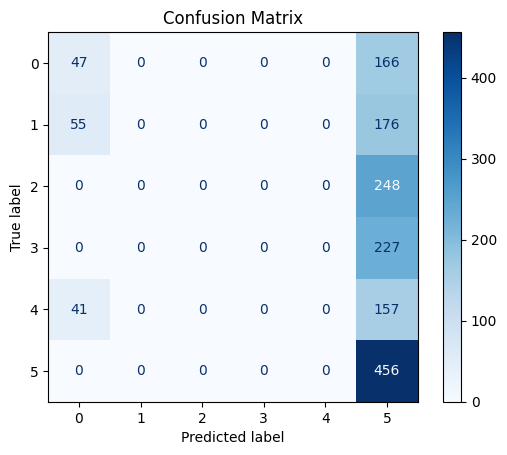

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_lr, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Decision Tree calssifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 89.7 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.62      0.67      0.64       213
           1       0.67      0.62      0.64       231
           2       1.00      1.00      1.00       248
           3       1.00      0.99      0.99       227
           4       0.99      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           0.90      1573
   macro avg       0.88      0.88      0.88      1573
weighted avg       0.90      0.90      0.90      1573

--------------------------------------------------------


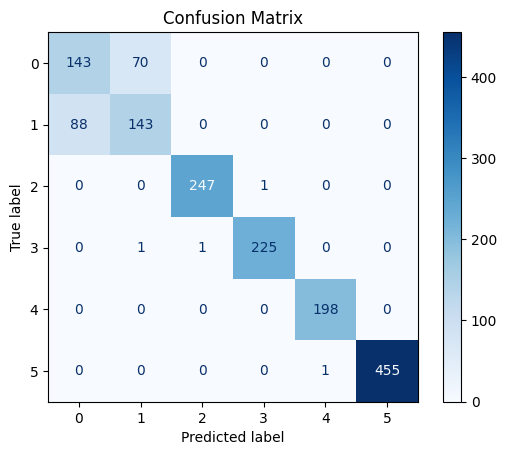

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

cm = confusion_matrix(y_test, y_pred_dec, labels=decision.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=decision.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
'''from sklearn.tree import plot_tree
plt.figure(figsize=(15,7))
plot_tree(decision,filled=True,feature_names=['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'])
plt.show()

SyntaxError: incomplete input (<ipython-input-73-da19e1edd820>, line 1)

In [ ]:
'''from sklearn import tree
def tree_plot(model_name):
    plt.figure(figsize=(20,20))
    features = df_class.columns
    classes = ['NO Fault','Line A to Ground Fault','Line B to Line C Fault','Line A Line B to Ground Fault','Line A Line B Line C','Line A Line B Line C to Ground Fault']
    tree.plot_tree(model_name,feature_names=features,class_names=classes,filled=True)
    plt.show()

tree_plot(decision)

SyntaxError: incomplete input (<ipython-input-72-990dcc4d11af>, line 1)

Random Forest Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 88.87 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.58      0.63      0.61       213
           1       0.63      0.58      0.61       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           0.89      1573
   macro avg       0.87      0.87      0.87      1573
weighted avg       0.89      0.89      0.89      1573

--------------------------------------------------------


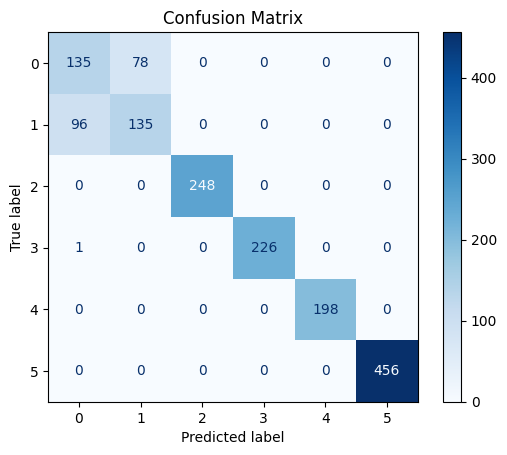

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

cm = confusion_matrix(y_test, y_pred_rf, labels=random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=random_forest.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

XGBoost classifier

Training Accuracy    : 92.94 %
Model Accuracy Score : 81.75 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.32      0.31      0.32       213
           1       0.38      0.40      0.39       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           0.82      1573
   macro avg       0.78      0.78      0.78      1573
weighted avg       0.82      0.82      0.82      1573

--------------------------------------------------------


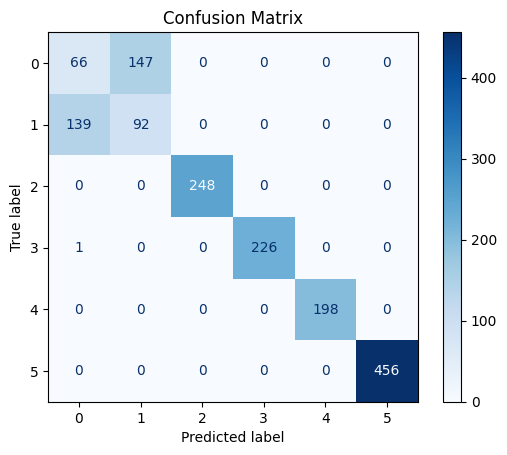

In [ ]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy    :",xgb_train ,"%")
print("Model Accuracy Score :",xgb_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")

cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Support vector machines

Training Accuracy    : 76.51 %
Model Accuracy Score : 74.19 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.48      0.35      0.40       213
           1       0.43      0.29      0.35       231
           2       0.75      0.83      0.78       248
           3       0.77      0.86      0.81       227
           4       0.79      0.86      0.82       198
           5       0.87      1.00      0.93       456

    accuracy                           0.74      1573
   macro avg       0.68      0.70      0.68      1573
weighted avg       0.71      0.74      0.72      1573

--------------------------------------------------------


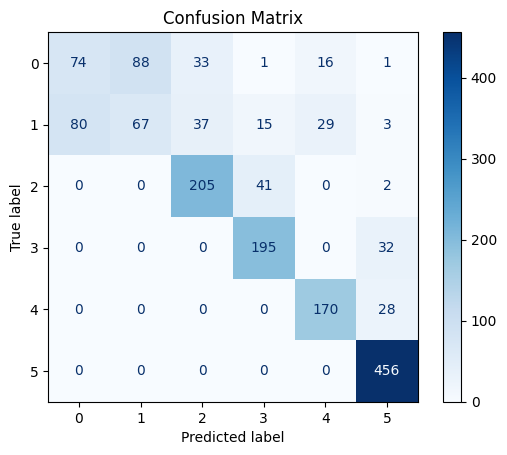

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

cm = confusion_matrix(y_test, y_pred_svc, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#model comparison

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree', 'XGBClassifier'
    ],

    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train, xgb_train],

    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy,
        xgb_accuracy
    ]
})

In [ ]:
pd.options.display.max_rows = 5
#pd.set_option('precision',2)
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='Blues').hide_index().set_properties(**{
            'font-family': 'Time New Roman',
            'color': 'lightgray',
            'font-size': '15px'
        })

Model,Training Accuracy,Model Accuracy Score
Random Forest,100.000000,89.700000
Decision Tree,100.000000,88.870000
XGBClassifier,92.940000,81.750000
Logistic Regression,76.510000,74.190000
Support Vector Machines,33.590000,31.980000


#Result Presiction

random forest classifeir

In [ ]:
prediction1 = random_forest.predict(X_test)
print(prediction1)

[0 0 1 ... 0 0 5]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(5).style.background_gradient(
        cmap='Blues').set_properties(**{
            'font-family': 'Time New Roman',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
551,3,3
2474,4,4
2285,4,4
283,3,3
7430,5,5


Decision Tree classifier

In [ ]:
prediction2 = decision.predict(X_test)
print(prediction2)

[0 0 0 ... 0 0 5]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction2})
cross_checking.sample(5).style.background_gradient(
        cmap='Blues').set_properties(**{
            'font-family': 'Time New Roman',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
5376,1,1
5409,1,1
88,3,3
3919,0,1
7728,5,5


XGB classifier

In [ ]:
prediction3 = xgb.predict(X_test)
print(prediction3)

[0 1 1 ... 1 1 5]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction3})
cross_checking.sample(5).style.background_gradient(
        cmap='Blues').set_properties(**{
            'font-family': 'Time New Roman',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
7576,5,5
3251,4,4
5489,1,1
1654,2,2
5394,1,1


Support vector machines

In [ ]:
prediction4 = svc.predict(X_test)
print(prediction4)

[0 2 1 ... 0 2 5]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction4})
cross_checking.sample(5).style.background_gradient(
        cmap='Blues').set_properties(**{
            'font-family': 'Time New Roman',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
7442,5,5
3180,4,4
1204,2,3
306,3,3
4442,1,1


Logistic Regression

In [ ]:
prediction5 = logreg.predict(X_test)
print(prediction5)

[0 5 5 ... 5 5 5]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction5})
cross_checking.sample(5).style.background_gradient(
        cmap='Blues').set_properties(**{
            'font-family': '',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
4367,1,5
662,3,5
2146,2,5
6718,5,5
5663,5,5
